# Explore the data

This jupyter notebook is dedicated to exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import colors
import numpy as np
import operator

In [2]:
GO=pd.read_csv('../data/GO_Processes_In_Resistance.csv')
PF_genes=pd.read_csv('../data/PFalciparum_Gene_GOterms.csv')
train=pd.read_csv('../data/SubCh1_TrainingData.csv')
test=pd.read_csv('../data/SubCh1_TestData.csv')

In [3]:
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance
0,GO:0020033,antigenic variation,0
1,GO:0098609,cell-cell adhesion,1
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1
4,GO:0042000,translocation of peptides or proteins into host,0


In [4]:
GO.shape

(539, 3)

In [5]:
PF_genes.head()

,Gene ID,Genomic Location (Gene),Product Description,Computed GO Component IDs,Computed GO Components,Computed GO Function IDs,Computed GO Functions,Computed GO Process IDs,Computed GO Processes,Curated GO Component IDs,Curated GO Components,Curated GO Function IDs,Curated GO Functions,Curated GO Process IDs,Curated GO Processes,EC numbers,EC numbers from OrthoMCL
0,PF3D7_0100100,"Pf3D7_01_v3:29,510..37,126(+)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,GO:0020002;GO:0020030,host cell plasma membrane;infected host cell s...,GO:0050839,cell adhesion molecule binding,GO:0020033;GO:0098609;GO:0020035;GO:0020013,antigenic variation;cell-cell adhesion;cytoadh...,NaN,NaN
1,PF3D7_0100200,"Pf3D7_01_v3:38,982..40,207(-)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,NaN,NaN,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
2,PF3D7_0100300,"Pf3D7_01_v3:42,367..46,507(-)","erythrocyte membrane protein 1, PfEMP1",GO:0016021,integral component of membrane,GO:0046789,host cell surface receptor binding,GO:0009405,pathogenesis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PF3D7_0100400,"Pf3D7_01_v3:50,363..51,636(+)",rifin,NaN,NaN,NaN,NaN,NaN,NaN,GO:0020036;GO:0020002;GO:0020003,Maurer's cleft;host cell plasma membrane;symbi...,GO:0046812,host cell surface binding,GO:0020033;GO:0020035;GO:0020013,antigenic variation;cytoadherence to microvasc...,NaN,NaN
4,PF3D7_0100500,"Pf3D7_01_v3:53,169..53,280(-)","erythrocyte membrane protein 1 (PfEMP1), exon ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
PF_genes.shape

(5758, 17)

In [7]:
train.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [8]:
train.shape

(272, 5546)

In [9]:
test.head()

,Sample_Names,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_31.24HR.DHA.BRep1,isolate_31,24HR,DHA,BRep1,0.416583,-2.304394,-1.279308,-1.128485,0.129698,...,0.117763,-1.650283,-0.520373,-1.301428,-5.326124,-0.352736,-1.567931,-4.446439,-1.875440,NaN
1,isolate_31.24HR.DHA.BRep2,isolate_31,24HR,DHA,BRep2,0.247195,-2.176939,-1.470318,-0.676434,-0.206543,...,0.472336,-1.151134,-0.342707,-1.001569,-5.337602,-0.672201,-1.494983,-4.299427,-1.553652,NaN
2,isolate_31.24HR.UT.BRep1,isolate_31,24HR,UT,BRep1,-0.197699,-0.572531,0.270896,0.557528,-0.698585,...,-0.309768,-6.330446,-0.850889,-1.603832,-3.256602,-2.517157,-0.650735,-4.841146,0.153951,NaN
3,isolate_31.24HR.UT.BRep2,isolate_31,24HR,UT,BRep2,0.966916,-1.723830,-1.102392,-0.797996,0.032847,...,-0.254186,-1.516661,-1.916219,-1.858716,-6.483167,-0.827476,-1.454423,-5.264615,-2.367444,NaN
4,isolate_31.6HR.DHA.BRep1,isolate_31,6HR,DHA,BRep1,0.125273,-1.665749,-2.510245,-1.454094,-1.763451,...,0.653097,-2.383878,-2.731928,-2.557962,-5.697488,-3.466542,-2.147289,-4.358510,-1.929927,NaN


In [10]:
test.shape

(200, 5546)

(array([ 2.,  5.,  8., 17., 34., 49., 61., 48., 34., 14.]),
 array([-4.88476204, -4.4575967 , -4.03043136, -3.60326603, -3.17610069,
        -2.74893535, -2.32177001, -1.89460467, -1.46743934, -1.040274  ,
        -0.61310866]),
 <a list of 10 Patch objects>)

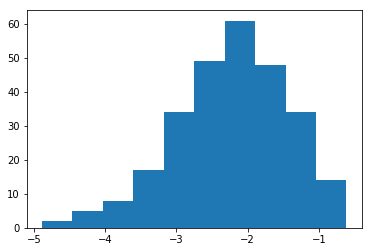

In [11]:
plt.hist(train["PF3D7_0100100"])

In [12]:
list_A = [1, 2, 3]
list_B = [3, 4, 5]
intersection = list( set(list_A) & set(list_B))
intersection

[3]

## 2. Find important genes

"""
SECTION DESCRIPTION HERE
"""

### 2.1 Add column "gene_count" and "genes" to the GO dataframe

From the dataframe PF_genes, extract the "Curated GO Process ID" and add it to the GO dataframe by matching them to the column "GO Process ID"

### 2.1.1 Create new DataFrame Gene_to_Curated_GO_Process_ID_df

In [13]:
Gene_to_Go_Process_df=pd.DataFrame({'Gene_ID':PF_genes['Gene ID'],\
                                               'Curated_Go_Process_IDs':PF_genes['Curated GO Process IDs']})
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,GO:0020033;GO:0098609;GO:0020035;GO:0020013
1,PF3D7_0100200,GO:0020033;GO:0020035;GO:0020013
2,PF3D7_0100300,NaN
3,PF3D7_0100400,GO:0020033;GO:0020035;GO:0020013
4,PF3D7_0100500,NaN
5,PF3D7_0100600,GO:0020033
6,PF3D7_0100700,NaN
7,PF3D7_0100800,GO:0020033;GO:0020035;GO:0020013
8,PF3D7_0100900,GO:0020033;GO:0020035;GO:0020013
9,PF3D7_0101000,GO:0020033;GO:0020035;GO:0020013


In [14]:
Gene_to_Go_Process_df.dropna(inplace=True)
Gene_to_Go_Process_df['Curated_Go_Process_IDs']=\
    Gene_to_Go_Process_df['Curated_Go_Process_IDs']\
    .str.split(';', n=-1)

In [15]:
Gene_to_Go_Process_df.head(10)

,Gene_ID,Curated_Go_Process_IDs
0,PF3D7_0100100,"[GO:0020033, GO:0098609, GO:0020035, GO:0020013]"
1,PF3D7_0100200,"[GO:0020033, GO:0020035, GO:0020013]"
3,PF3D7_0100400,"[GO:0020033, GO:0020035, GO:0020013]"
5,PF3D7_0100600,[GO:0020033]
7,PF3D7_0100800,"[GO:0020033, GO:0020035, GO:0020013]"
8,PF3D7_0100900,"[GO:0020033, GO:0020035, GO:0020013]"
9,PF3D7_0101000,"[GO:0020033, GO:0020035, GO:0020013]"
12,PF3D7_0101300,[GO:0042000]
15,PF3D7_0101600,"[GO:0020033, GO:0020035, GO:0020013]"
17,PF3D7_0101800,[GO:0020013]


### 2.1.2 Reorganize Gene_to_Go_Process_df to map each Curated_Go_Process_ID to the corresponding Gene_ID

In [16]:
GO_Process_to_Gene_list=[]

for idx, row in Gene_to_Go_Process_df.iterrows():
    for GO_Process in row['Curated_Go_Process_IDs']:
        GO_Process_to_Gene_list.append([GO_Process,row['Gene_ID']])

GO_Process_to_Gene_df=pd.DataFrame(GO_Process_to_Gene_list, 
                                   columns=['Curated_Go_Process_IDs','Gene_ID'])

In [17]:
GO_Process_to_Gene_df.sort_values('Curated_Go_Process_IDs', 
                                 inplace=True)
GO_Process_to_Gene_df.reset_index(drop=True,inplace=True)

In [18]:
GO_Process_to_Gene_df=GO_Process_to_Gene_df\
.groupby('Curated_Go_Process_IDs')['Gene_ID']\
.apply(list).to_frame()

In [19]:
GO_Process_to_Gene_df.reset_index(inplace=True)

In [20]:
GO_Process_to_Gene_df.head(10)

,Curated_Go_Process_IDs,Gene_ID
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,..."
1,GO:0000042,[PF3D7_0621350]
2,GO:0000045,[PF3D7_1015900]
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]"
4,GO:0000070,[PF3D7_1130700]
5,GO:0000079,[PF3D7_1304700]
6,GO:0000165,[PF3D7_1113900]
7,GO:0000184,[PF3D7_1005500]
8,GO:0000209,[PF3D7_1211800]
9,GO:0000226,"[PF3D7_1008700, PF3D7_0803700]"


### 2.1.3 Add the column Gene_Count to the GO_Process_to_Gene_df

In [21]:
Gene_Count=[len(gene_list) for gene_list in list(GO_Process_to_Gene_df["Gene_ID"])]
GO_Process_to_Gene_df['Gene_Count']=Gene_Count
GO_Process_to_Gene_df.head()

,Curated_Go_Process_IDs,Gene_ID,Gene_Count
0,GO:0000027,"[PF3D7_API03500, PF3D7_0729400, PF3D7_0921800,...",9
1,GO:0000042,[PF3D7_0621350],1
2,GO:0000045,[PF3D7_1015900],1
3,GO:0000055,"[PF3D7_1423000, PF3D7_0729300]",2
4,GO:0000070,[PF3D7_1130700],1


### 2.1.4 Merge the DataFrames Go and GO_Process_IDs by the GO_Process column

In [22]:
GO=pd.merge(GO,GO_Process_to_Gene_df,left_on='GO Process ID',
             right_on='Curated_Go_Process_IDs')
GO.drop('Curated_Go_Process_IDs', axis=1, inplace=True)
GO.head()

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0020033,antigenic variation,0,"[PF3D7_0100600, PF3D7_1254000, PF3D7_1200100, ...",202
1,GO:0098609,cell-cell adhesion,1,"[PF3D7_1041300, PF3D7_0412700, PF3D7_1100100, ...",57
2,GO:0020035,"cytoadherence to microvasculature, mediated by...",1,"[PF3D7_0200600, PF3D7_1300200, PF3D7_0413200, ...",165
3,GO:0020013,modulation by symbiont of host erythrocyte agg...,1,"[PF3D7_1101100, PF3D7_1200600, PF3D7_1200100, ...",190
4,GO:0042000,translocation of peptides or proteins into host,0,"[PF3D7_0101300, PF3D7_0114100, PF3D7_0713100, ...",10


### 2.2 Find the distribution of Gene_Count

Text(0.5, 1.0, 'Gene_Count distribution: All GO Processes')

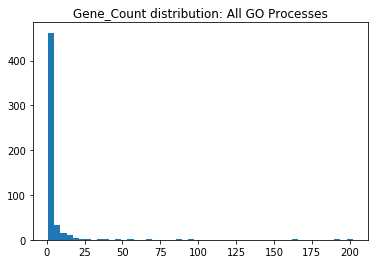

In [23]:
plt.hist(GO['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: All GO Processes')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

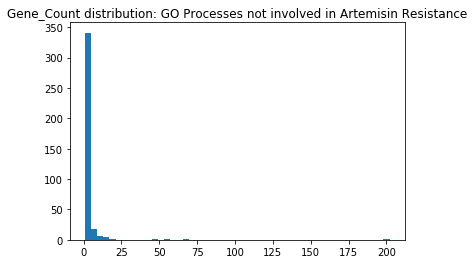

In [24]:
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==0]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes not involved in Artemisin Resistance')

Text(0.5, 1.0, 'Gene_Count distribution: GO Processes involved in Artemisin Resistance')

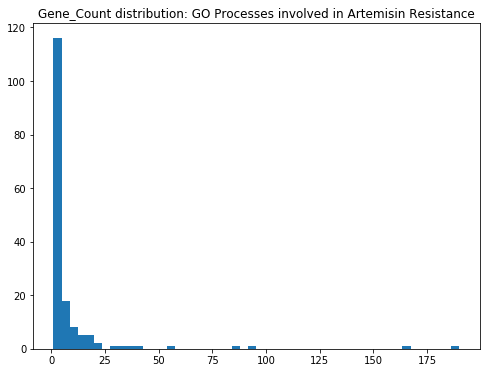

In [25]:
plt.figure(figsize=(8,6))
plt.hist(GO[GO['IsInvolvedInArtemisinResistance']==1]['Gene_Count'].values,bins=50)
plt.title('Gene_Count distribution: GO Processes involved in Artemisin Resistance')

### 2.3 Filter the GO DataFrame

Keep the Go Processes Involved in Artemisin Resistance and Gene_Count <= 25

In [26]:
GO=GO[GO['IsInvolvedInArtemisinResistance']==1].reset_index(drop=True)
GO=GO[GO['Gene_Count']<=25].reset_index(drop=True)

In [27]:
GO.head(10)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


### 2.4 Create a list of unique genes involved in Artemisin resistance

In [28]:
result = set()
for row in range(len(GO)):
    result = result | set(GO["Gene_ID"][row])
result = list(result)
print("Total of genes including after filtering: {}".format(len(result)))

Total of genes including after filtering: 489


### Save final gene list to file

In [29]:
f = open("../data/Important_PF_genes.txt", "w")
f.write("\n".join(result))
f.close()

### 2.5 Filter the train DataFrame 

Keep only the important genes found in previous steps.

In [30]:
genes_to_keep = set(list(train.columns)) & set(result)
genes_to_keep = list(genes_to_keep)
columns_to_keep = list(train.columns)[0:5] + \
[list(train.columns)[-1]] + genes_to_keep
columns_to_keep

['Sample_Name',
 'Isolate',
 'Timepoint',
 'Treatment',
 'BioRep',
 'DHA_IC50',
 'PF3D7_0812300',
 'PF3D7_1420300',
 'PF3D7_1234600',
 'PF3D7_0710800',
 'PF3D7_0512600',
 'PF3D7_1368700',
 'PF3D7_1114800',
 'PF3D7_1429800',
 'PF3D7_0612900',
 'PF3D7_1212800',
 'PF3D7_1105500',
 'PF3D7_0629000',
 'PF3D7_0723500',
 'PF3D7_1134000',
 'PF3D7_1215300',
 'PF3D7_1326400',
 'PF3D7_1120100',
 'PF3D7_1361100',
 'PF3D7_1124500',
 'PF3D7_1330600',
 'PF3D7_1346800',
 'PF3D7_0509800',
 'PF3D7_0618900',
 'PF3D7_0211400',
 'PF3D7_1238800',
 'PF3D7_0821800',
 'PF3D7_1212700',
 'PF3D7_0828500',
 'PF3D7_1240000',
 'PF3D7_0527500',
 'PF3D7_1431300',
 'PF3D7_0814300',
 'PF3D7_0602400',
 'PF3D7_1335900',
 'PF3D7_1453800',
 'PF3D7_1342500',
 'PF3D7_1431600',
 'PF3D7_1428300',
 'PF3D7_1347200',
 'PF3D7_1105600',
 'PF3D7_0930300',
 'PF3D7_0321200',
 'PF3D7_1015600',
 'PF3D7_1032400',
 'PF3D7_1419100',
 'PF3D7_1406700',
 'PF3D7_0501300',
 'PF3D7_1432700',
 'PF3D7_1216500',
 'PF3D7_1472100',
 'PF3D7_1420600',
 '

In [31]:
filtered_train = train[columns_to_keep]

In [32]:
filtered_train.head(10)

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,DHA_IC50,PF3D7_0812300,PF3D7_1420300,PF3D7_1234600,PF3D7_0710800,...,PF3D7_1128700,PF3D7_0822600,PF3D7_1317900,PF3D7_1209300,PF3D7_1017400,PF3D7_0502000,PF3D7_1420900,PF3D7_1315600,PF3D7_1028300,PF3D7_1304700
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,2.177,0.963872,-0.022542,1.230309,0.319121,...,0.672133,-0.886092,-0.220486,0.166994,-2.688612,-0.873693,0.672910,-0.739445,-0.405819,-0.045264
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,2.177,-0.068908,0.760342,-0.366080,0.200812,...,-0.069168,-0.083582,0.481034,-0.598221,0.192984,-0.046433,-0.123671,-1.319330,0.652344,-0.298064
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,2.177,-0.003263,1.032977,-0.557202,0.948807,...,-0.214998,-0.424182,1.214852,-0.947459,1.227944,0.810243,0.363007,-0.315694,0.672469,0.387098
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,2.177,0.141223,1.207506,-0.255965,1.041579,...,-0.337716,0.268409,0.800302,-0.581491,-0.541044,0.317433,-0.311847,-0.992889,1.527979,-0.493798
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,2.177,-0.682295,0.472749,0.617004,0.838052,...,-0.418907,-0.525675,0.626240,-0.623723,-0.475430,0.963267,-0.166802,-1.042777,0.663536,0.383817
5,isolate_01.6HR.DHA.BRep2,isolate_01,6HR,DHA,BRep2,2.177,0.479636,0.199607,-0.065627,0.403183,...,0.198087,0.134606,0.431564,-0.480786,-1.141273,-0.187093,0.186034,-1.302482,0.273662,-0.917934
6,isolate_01.6HR.UT.BRep1,isolate_01,6HR,UT,BRep1,2.177,-0.737002,0.794378,-0.106473,1.179442,...,-0.739924,-0.308459,1.215693,-1.083396,-0.027479,0.849738,-0.391730,-0.888313,1.149660,-0.235019
7,isolate_01.6HR.UT.BRep2,isolate_01,6HR,UT,BRep2,2.177,-0.148082,1.413584,-0.335922,0.719219,...,-0.017424,0.677341,1.435446,-1.012387,0.281411,0.926258,0.298563,-0.606928,0.855247,-0.196541
8,isolate_02.24HR.DHA.BRep1,isolate_02,24HR,DHA,BRep1,1.697,-0.219479,0.797058,0.049259,0.604104,...,0.037658,0.444737,0.719069,-0.845092,-0.189015,0.396607,0.128231,-1.351999,0.779426,-0.392599
9,isolate_02.24HR.DHA.BRep2,isolate_02,24HR,DHA,BRep2,1.697,0.190229,1.209980,-0.210414,1.034743,...,-0.305020,-0.385073,1.293135,-0.705637,-0.887918,1.214048,0.187398,-1.082210,1.333236,0.505609


## 3. Create new train DataFrame with engineered features

In [33]:
aggregated_means_train = filtered_train.groupby(["Isolate","Timepoint","Treatment"]).mean()

In [34]:
aggregated_means_train.head(10)

DHA_IC50  PF3D7_0812300  PF3D7_1420300  \
Isolate    Timepoint Treatment                                           
isolate_01 24HR      DHA           2.177       0.447482       0.368900   
                     UT            2.177       0.068980       1.120242   
           6HR       DHA           2.177      -0.101330       0.336178   
                     UT            2.177      -0.442542       1.103981   
isolate_02 24HR      DHA           1.697      -0.075244       0.921512   
                     UT            1.697       0.262744       0.549854   
           6HR       DHA           1.697      -0.013624       0.446887   
                     UT            1.697       0.364039       0.690014   
isolate_03 24HR      DHA           1.799      -0.424136       0.229135   
                     UT            1.799       0.527204       0.680699   

                                PF3D7_1234600  PF3D7_0710800  PF3D7_0512600  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.432115       0.259967      -1.297384   
                     UT             -0.406583       0.995193      -1.338757   
           6HR       DHA             0.275689       0.620617      -1.231613   
                     UT             -0.221198       0.949331      -0.928730   
isolate_02 24HR      DHA            -0.359269       0.678552      -0.824932   
                     UT             -0.187211       0.418116      -1.380131   
           6HR       DHA            -0.089005       0.443117      -0.920935   
                     UT             -0.256327       0.482472      -1.523488   
isolate_03 24HR      DHA             0.202430       0.467035      -0.861054   
                     UT              0.167307       0.348287      -1.489540   

                                PF3D7_1368700  PF3D7_1114800  PF3D7_1429800  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA             0.080798       0.146696      -0.453781   
                     UT             -0.282215      -0.049757       0.133334   
           6HR       DHA             0.410847       0.164891      -0.205222   
                     UT             -0.150157      -0.219505       0.572538   
isolate_02 24HR      DHA            -0.089342      -0.055881       0.129081   
                     UT             -0.146143       0.236634      -0.247470   
           6HR       DHA            -0.252670       0.089379      -0.177483   
                     UT             -0.444497       0.146553      -0.193780   
isolate_03 24HR      DHA             0.727760      -0.126801       0.293993   
                     UT              0.133737       0.116196      -0.232430   

                                PF3D7_0612900  ...  PF3D7_1128700  \
Isolate    Timepoint Treatment                 ...                  
isolate_01 24HR      DHA            -0.467357  ...       0.301482   
                     UT              0.357258  ...      -0.276357   
           6HR       DHA            -0.398789  ...      -0.110410   
                     UT              0.247327  ...      -0.378674   
isolate_02 24HR      DHA            -0.003243  ...      -0.085712   
                     UT             -0.068095  ...       0.083645   
           6HR       DHA            -0.250069  ...      -0.211039   
                     UT             -0.042097  ...       0.061679   
isolate_03 24HR      DHA            -0.248643  ...      -0.145777   
                     UT             -0.453570  ...       0.289757   

                                PF3D7_0822600  PF3D7_1317900  PF3D7_1209300  \
Isolate    Timepoint Treatment                                                
isolate_01 24HR      DHA            -0.484837       0.130274      -0.215613   
                     UT             -0.077887       1.007577      -0.764475   
           6HR       DHA            -0.195535       0.528902      -0.552255   
                     

In [35]:
aggregated_means_train.index[5]


('isolate_02', '24HR', 'UT')

In [36]:
genes_list=aggregated_means_train.columns[1:]
list(genes_list)

['PF3D7_0812300',
 'PF3D7_1420300',
 'PF3D7_1234600',
 'PF3D7_0710800',
 'PF3D7_0512600',
 'PF3D7_1368700',
 'PF3D7_1114800',
 'PF3D7_1429800',
 'PF3D7_0612900',
 'PF3D7_1212800',
 'PF3D7_1105500',
 'PF3D7_0629000',
 'PF3D7_0723500',
 'PF3D7_1134000',
 'PF3D7_1215300',
 'PF3D7_1326400',
 'PF3D7_1120100',
 'PF3D7_1361100',
 'PF3D7_1124500',
 'PF3D7_1330600',
 'PF3D7_1346800',
 'PF3D7_0509800',
 'PF3D7_0618900',
 'PF3D7_0211400',
 'PF3D7_1238800',
 'PF3D7_0821800',
 'PF3D7_1212700',
 'PF3D7_0828500',
 'PF3D7_1240000',
 'PF3D7_0527500',
 'PF3D7_1431300',
 'PF3D7_0814300',
 'PF3D7_0602400',
 'PF3D7_1335900',
 'PF3D7_1453800',
 'PF3D7_1342500',
 'PF3D7_1431600',
 'PF3D7_1428300',
 'PF3D7_1347200',
 'PF3D7_1105600',
 'PF3D7_0930300',
 'PF3D7_0321200',
 'PF3D7_1015600',
 'PF3D7_1032400',
 'PF3D7_1419100',
 'PF3D7_1406700',
 'PF3D7_0501300',
 'PF3D7_1432700',
 'PF3D7_1216500',
 'PF3D7_1472100',
 'PF3D7_1420600',
 'PF3D7_1361800',
 'PF3D7_1338300',
 'PF3D7_0613500',
 'PF3D7_1439900',
 'PF3D7_14

### 3.1 Flatten the aggregated_means_train data frame 

We do this so that each row is an isolate and the different timepoints and treatments become columns

**Before**
```python

| Isolate  | Timepoint | Treatment | PF3D7_0107600 |
|----------|-----------|-----------|---------------|
|isolate_01|       24Hr|        DHA|         value1|
|          |           |         UT|         value2|
|          |        6Hr|        DHA|         value3|
|          |           |         UT|         value4|
```

**After**
```python
print(flat_train)

| Isolate  | PF3D7_0107600_24HR_DHA | PF3D7_0107600_24HR_UT | PF3D7_0107600_6HR_DHA | PF3D7_0107600_6HR_UT |
|----------|------------------------|-----------------------|-----------------------|----------------------|
|isolate_01|                  value1|                 value2|                 value3|                value4|
```

In [37]:
gene_dict={}
isolate_comb_list=['_24HR_DHA','_24HR_UT','_6HR_DHA','_6HR_UT']
for gene in genes_list:
    gene_dict[gene]=[gene+comb for comb in isolate_comb_list]

In [38]:
gene_dict

{'PF3D7_0812300': ['PF3D7_0812300_24HR_DHA',
  'PF3D7_0812300_24HR_UT',
  'PF3D7_0812300_6HR_DHA',
  'PF3D7_0812300_6HR_UT'],
 'PF3D7_1420300': ['PF3D7_1420300_24HR_DHA',
  'PF3D7_1420300_24HR_UT',
  'PF3D7_1420300_6HR_DHA',
  'PF3D7_1420300_6HR_UT'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_DHA',
  'PF3D7_1234600_24HR_UT',
  'PF3D7_1234600_6HR_DHA',
  'PF3D7_1234600_6HR_UT'],
 'PF3D7_0710800': ['PF3D7_0710800_24HR_DHA',
  'PF3D7_0710800_24HR_UT',
  'PF3D7_0710800_6HR_DHA',
  'PF3D7_0710800_6HR_UT'],
 'PF3D7_0512600': ['PF3D7_0512600_24HR_DHA',
  'PF3D7_0512600_24HR_UT',
  'PF3D7_0512600_6HR_DHA',
  'PF3D7_0512600_6HR_UT'],
 'PF3D7_1368700': ['PF3D7_1368700_24HR_DHA',
  'PF3D7_1368700_24HR_UT',
  'PF3D7_1368700_6HR_DHA',
  'PF3D7_1368700_6HR_UT'],
 'PF3D7_1114800': ['PF3D7_1114800_24HR_DHA',
  'PF3D7_1114800_24HR_UT',
  'PF3D7_1114800_6HR_DHA',
  'PF3D7_1114800_6HR_UT'],
 'PF3D7_1429800': ['PF3D7_1429800_24HR_DHA',
  'PF3D7_1429800_24HR_UT',
  'PF3D7_1429800_6HR_DHA',
  'PF3D7_1429800_6H

In [39]:
isolates_list=aggregated_means_train.index.get_level_values(0)
isolates_list=list(dict.fromkeys(isolates_list))
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

In [40]:
flat_train=pd.DataFrame()
genes=[]
for gene in genes_list:
    temp_list=[]
    for isolate in isolates_list:
        temp_list.append(aggregated_means_train.loc[isolate][gene].tolist())
    flat_train=pd.concat([flat_train,pd.DataFrame(data=temp_list,columns=gene_dict[gene])],axis=1)



In [41]:
flat_train.index=isolates_list
flat_train.head(10)

,PF3D7_0812300_24HR_DHA,PF3D7_0812300_24HR_UT,PF3D7_0812300_6HR_DHA,PF3D7_0812300_6HR_UT,PF3D7_1420300_24HR_DHA,PF3D7_1420300_24HR_UT,PF3D7_1420300_6HR_DHA,PF3D7_1420300_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_1315600_6HR_DHA,PF3D7_1315600_6HR_UT,PF3D7_1028300_24HR_DHA,PF3D7_1028300_24HR_UT,PF3D7_1028300_6HR_DHA,PF3D7_1028300_6HR_UT,PF3D7_1304700_24HR_DHA,PF3D7_1304700_24HR_UT,PF3D7_1304700_6HR_DHA,PF3D7_1304700_6HR_UT
isolate_01,0.447482,0.068980,-0.101330,-0.442542,0.368900,1.120242,0.336178,1.103981,0.432115,-0.406583,...,-1.172629,-0.747621,0.123263,1.100224,0.468599,1.002454,-0.171664,-0.053350,-0.267059,-0.215780
isolate_02,-0.075244,0.262744,-0.013624,0.364039,0.921512,0.549854,0.446887,0.690014,-0.359269,-0.187211,...,-0.477629,-1.433137,0.962172,0.457024,0.546566,0.667338,-0.008927,-0.156888,0.150228,-0.206055
isolate_03,-0.424136,0.527204,-0.369611,0.600361,0.229135,0.680699,0.900469,0.474880,0.202430,0.167307,...,-0.228757,-1.550960,0.496470,0.183954,1.055212,0.105886,0.215070,-0.125081,-0.202863,-0.059802
isolate_04,0.221920,0.219562,0.191989,0.440298,0.531819,1.045008,0.666908,0.316599,-0.465047,-0.738471,...,-1.206899,-1.150434,0.280699,1.016325,0.411739,0.578155,0.215768,0.018507,-0.131550,-0.363830
isolate_05,-0.337462,0.611763,0.376211,-0.318437,0.407196,0.723384,0.565744,1.115076,-0.797104,0.297453,...,-0.698651,-0.156199,0.702791,0.459007,0.562431,1.330278,0.235560,0.144245,-0.003456,0.464300
isolate_06,0.172193,0.008857,-0.364151,0.344369,0.569287,0.513760,0.776228,0.581881,0.017983,0.124795,...,-0.577448,-1.152457,0.670401,0.304256,0.916320,1.105475,-0.262231,0.062384,0.589443,-0.090236
isolate_07,-0.134082,-0.500932,-0.178548,0.093634,0.862968,0.774902,0.174478,0.832177,-0.452015,-0.149757,...,-0.081121,-0.871049,0.935257,0.644315,0.343402,1.008025,0.060860,0.177209,0.345801,-0.063442
isolate_08,-0.069540,-0.234910,0.372856,0.312757,0.923144,0.770523,0.213246,0.742729,-0.117850,-0.010984,...,-1.034023,-1.380063,0.903262,0.675342,0.576316,0.892167,0.385914,0.717853,-0.432480,-0.124577
isolate_09,-0.021737,0.462825,0.170889,-0.003587,0.423485,0.062513,0.679867,0.401085,0.223599,-0.264987,...,-1.117354,-0.381186,0.315199,0.056947,0.559305,0.691874,-0.108059,0.218985,-0.070330,-0.152025
isolate_10,0.209100,-0.071912,-0.031611,0.620761,0.236764,0.795743,0.236187,0.602846,-0.163682,-0.488134,...,-0.136867,-1.286048,0.219823,0.578285,0.292822,0.209784,-0.195516,0.080213,0.310699,-0.278538


### 3.2 Clustergram

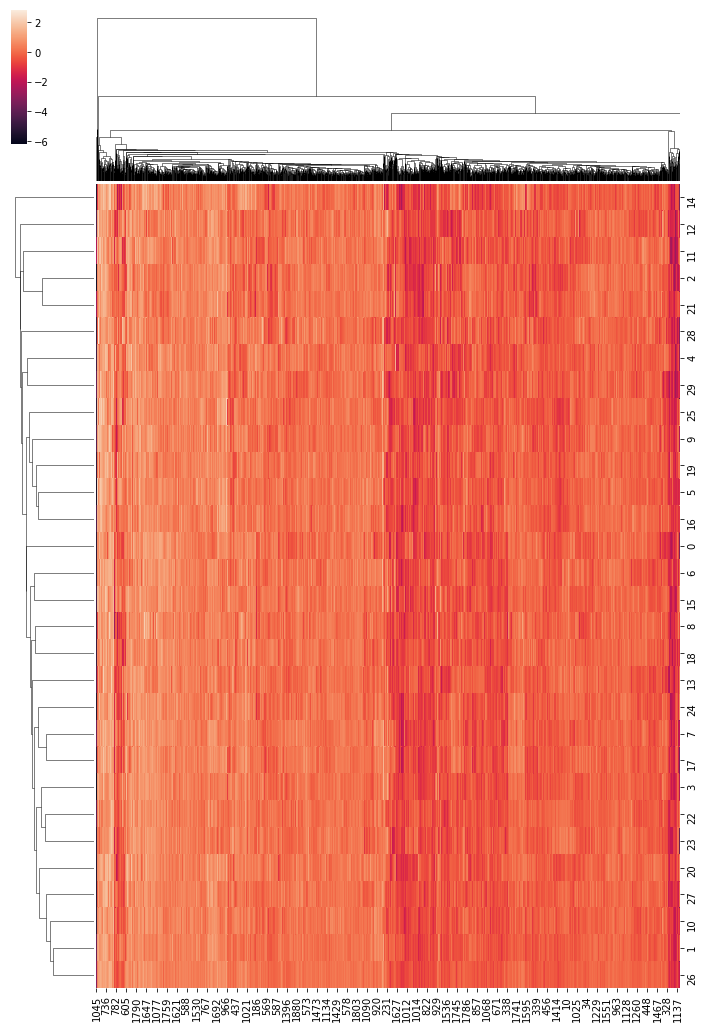

In [42]:
cltr=sn.clustermap(flat_train.values,figsize=(12,18))

In [43]:
reordered_isolates = cltr.dendrogram_row.reordered_ind

In [44]:
flat_IC50=train[["Isolate",'DHA_IC50']].drop_duplicates(keep='first')

In [45]:
flat_IC50.index = list(flat_IC50["Isolate"])

In [46]:
del flat_IC50["Isolate"]
flat_IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


In [47]:
flat_IC50.sort_values("DHA_IC50",ascending=False)

,DHA_IC50
isolate_08,3.4600
isolate_24,2.2360
isolate_16,2.2100
isolate_01,2.1770
isolate_05,2.0250
isolate_29,1.9900
isolate_19,1.9060
isolate_20,1.8240
isolate_11,1.8200
isolate_03,1.7990


### 3.3 Add the diferential between each timepoint-treatment combination

Add 4 columns containing the differential between the different timepoints and treatment combinations:

Delta_A=(24HR - 6HR) with DHA

Delta_B=(24HR - 6HR) with UT 

Delta_C=(DHA - UT) after 6HR

Delta_D=(DHA - UT) after 24HR


In [48]:
gene_deltas_dict={}
deltas_list=['_24HR_6HR_DHA','_24_6HR_UT','_DHA_UT_6HR','_DHA_UT_24HR']
for gene in genes_list:
    gene_deltas_dict[gene]=[gene+delta for delta in deltas_list]

In [49]:
gene_deltas_dict

{'PF3D7_0812300': ['PF3D7_0812300_24HR_6HR_DHA',
  'PF3D7_0812300_24_6HR_UT',
  'PF3D7_0812300_DHA_UT_6HR',
  'PF3D7_0812300_DHA_UT_24HR'],
 'PF3D7_1420300': ['PF3D7_1420300_24HR_6HR_DHA',
  'PF3D7_1420300_24_6HR_UT',
  'PF3D7_1420300_DHA_UT_6HR',
  'PF3D7_1420300_DHA_UT_24HR'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_6HR_DHA',
  'PF3D7_1234600_24_6HR_UT',
  'PF3D7_1234600_DHA_UT_6HR',
  'PF3D7_1234600_DHA_UT_24HR'],
 'PF3D7_0710800': ['PF3D7_0710800_24HR_6HR_DHA',
  'PF3D7_0710800_24_6HR_UT',
  'PF3D7_0710800_DHA_UT_6HR',
  'PF3D7_0710800_DHA_UT_24HR'],
 'PF3D7_0512600': ['PF3D7_0512600_24HR_6HR_DHA',
  'PF3D7_0512600_24_6HR_UT',
  'PF3D7_0512600_DHA_UT_6HR',
  'PF3D7_0512600_DHA_UT_24HR'],
 'PF3D7_1368700': ['PF3D7_1368700_24HR_6HR_DHA',
  'PF3D7_1368700_24_6HR_UT',
  'PF3D7_1368700_DHA_UT_6HR',
  'PF3D7_1368700_DHA_UT_24HR'],
 'PF3D7_1114800': ['PF3D7_1114800_24HR_6HR_DHA',
  'PF3D7_1114800_24_6HR_UT',
  'PF3D7_1114800_DHA_UT_6HR',
  'PF3D7_1114800_DHA_UT_24HR'],
 'PF3D7_1429800': ['

In [50]:
for gene in gene_dict.keys():
    
    state1=gene_dict[gene][0] #gene_24HR_DHA
    state2=gene_dict[gene][1] #gene_24HR_UT
    state3=gene_dict[gene][2] #gene_6HR_DHA
    state4=gene_dict[gene][3] #gene_6HR_UT
    
    delta_A=flat_train[state1]-flat_train[state3]
    delta_B=flat_train[state2]-flat_train[state4]
    delta_C=flat_train[state3]-flat_train[state4]
    delta_D=flat_train[state1]-flat_train[state2]
    
    delta_A_label=gene_deltas_dict[gene][0] #gene_24HR_6HR_DHA
    delta_B_label=gene_deltas_dict[gene][1] #gene_24HR_6HR_UT
    delta_C_label=gene_deltas_dict[gene][2] #gene_DHA_UT_6HR
    delta_D_label=gene_deltas_dict[gene][3] #gene_DHA_UT_24HR
    
    temp_df=pd.DataFrame({delta_A_label:delta_A,delta_B_label:delta_B,delta_C_label:delta_C,delta_D_label:delta_D})
    flat_train=pd.concat([flat_train,temp_df],axis=1)

In [51]:
flat_train.head(10)

,PF3D7_0812300_24HR_DHA,PF3D7_0812300_24HR_UT,PF3D7_0812300_6HR_DHA,PF3D7_0812300_6HR_UT,PF3D7_1420300_24HR_DHA,PF3D7_1420300_24HR_UT,PF3D7_1420300_6HR_DHA,PF3D7_1420300_6HR_UT,PF3D7_1234600_24HR_DHA,PF3D7_1234600_24HR_UT,...,PF3D7_1315600_DHA_UT_6HR,PF3D7_1315600_DHA_UT_24HR,PF3D7_1028300_24HR_6HR_DHA,PF3D7_1028300_24_6HR_UT,PF3D7_1028300_DHA_UT_6HR,PF3D7_1028300_DHA_UT_24HR,PF3D7_1304700_24HR_6HR_DHA,PF3D7_1304700_24_6HR_UT,PF3D7_1304700_DHA_UT_6HR,PF3D7_1304700_DHA_UT_24HR
isolate_01,0.447482,0.068980,-0.101330,-0.442542,0.368900,1.120242,0.336178,1.103981,0.432115,-0.406583,...,-0.425009,-0.375096,-0.345336,0.097770,-0.533855,-0.976961,0.095395,0.162430,-0.051279,-0.118314
isolate_02,-0.075244,0.262744,-0.013624,0.364039,0.921512,0.549854,0.446887,0.690014,-0.359269,-0.187211,...,0.955508,0.071530,0.415606,-0.210314,-0.120772,0.505149,-0.159156,0.049167,0.356283,0.147961
isolate_03,-0.424136,0.527204,-0.369611,0.600361,0.229135,0.680699,0.900469,0.474880,0.202430,0.167307,...,1.322203,0.445678,-0.558742,0.078067,0.949325,0.312516,0.417933,-0.065279,-0.143061,0.340151
isolate_04,0.221920,0.219562,0.191989,0.440298,0.531819,1.045008,0.666908,0.316599,-0.465047,-0.738471,...,-0.056466,1.035690,-0.131039,0.438170,-0.166416,-0.735626,0.347318,0.382337,0.232280,0.197261
isolate_05,-0.337462,0.611763,0.376211,-0.318437,0.407196,0.723384,0.565744,1.115076,-0.797104,0.297453,...,-0.542453,1.254182,0.140360,-0.871272,-0.767847,0.243784,0.239016,-0.320056,-0.467756,0.091316
isolate_06,0.172193,0.008857,-0.364151,0.344369,0.569287,0.513760,0.776228,0.581881,0.017983,0.124795,...,0.575009,0.039057,-0.245919,-0.801219,-0.189155,0.366145,-0.851674,0.152620,0.679679,-0.324615
isolate_07,-0.134082,-0.500932,-0.178548,0.093634,0.862968,0.774902,0.174478,0.832177,-0.452015,-0.149757,...,0.789928,-0.264810,0.591855,-0.363710,-0.664623,0.290942,-0.284940,0.240651,0.409243,-0.116349
isolate_08,-0.069540,-0.234910,0.372856,0.312757,0.923144,0.770523,0.213246,0.742729,-0.117850,-0.010984,...,0.346040,-0.259049,0.326946,-0.216825,-0.315851,0.227920,0.818394,0.842430,-0.307902,-0.331939
isolate_09,-0.021737,0.462825,0.170889,-0.003587,0.423485,0.062513,0.679867,0.401085,0.223599,-0.264987,...,-0.736168,-0.365515,-0.244106,-0.634927,-0.132569,0.258251,-0.037728,0.371010,0.081695,-0.327044
isolate_10,0.209100,-0.071912,-0.031611,0.620761,0.236764,0.795743,0.236187,0.602846,-0.163682,-0.488134,...,1.149180,-0.477039,-0.072999,0.368501,0.083038,-0.358462,-0.506216,0.358751,0.589238,-0.275729


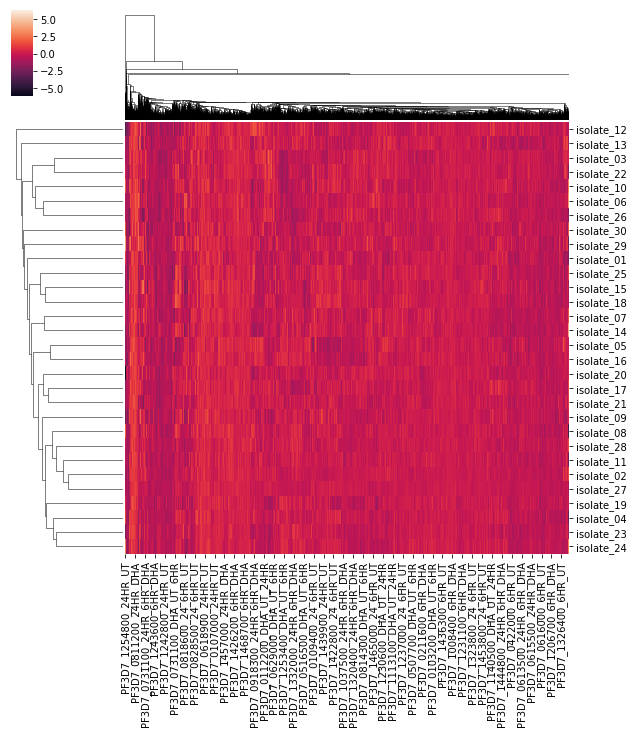

In [52]:
c = sn.clustermap(flat_train)

In [53]:
tmp = flat_train.copy()
tmp = pd.concat([flat_IC50, tmp], axis=1) 

In [54]:
tmp.head()

,DHA_IC50,PF3D7_0812300_24HR_DHA,PF3D7_0812300_24HR_UT,PF3D7_0812300_6HR_DHA,PF3D7_0812300_6HR_UT,PF3D7_1420300_24HR_DHA,PF3D7_1420300_24HR_UT,PF3D7_1420300_6HR_DHA,PF3D7_1420300_6HR_UT,PF3D7_1234600_24HR_DHA,...,PF3D7_1315600_DHA_UT_6HR,PF3D7_1315600_DHA_UT_24HR,PF3D7_1028300_24HR_6HR_DHA,PF3D7_1028300_24_6HR_UT,PF3D7_1028300_DHA_UT_6HR,PF3D7_1028300_DHA_UT_24HR,PF3D7_1304700_24HR_6HR_DHA,PF3D7_1304700_24_6HR_UT,PF3D7_1304700_DHA_UT_6HR,PF3D7_1304700_DHA_UT_24HR
isolate_01,2.177,0.447482,0.068980,-0.101330,-0.442542,0.368900,1.120242,0.336178,1.103981,0.432115,...,-0.425009,-0.375096,-0.345336,0.097770,-0.533855,-0.976961,0.095395,0.162430,-0.051279,-0.118314
isolate_02,1.697,-0.075244,0.262744,-0.013624,0.364039,0.921512,0.549854,0.446887,0.690014,-0.359269,...,0.955508,0.071530,0.415606,-0.210314,-0.120772,0.505149,-0.159156,0.049167,0.356283,0.147961
isolate_03,1.799,-0.424136,0.527204,-0.369611,0.600361,0.229135,0.680699,0.900469,0.474880,0.202430,...,1.322203,0.445678,-0.558742,0.078067,0.949325,0.312516,0.417933,-0.065279,-0.143061,0.340151
isolate_04,0.710,0.221920,0.219562,0.191989,0.440298,0.531819,1.045008,0.666908,0.316599,-0.465047,...,-0.056466,1.035690,-0.131039,0.438170,-0.166416,-0.735626,0.347318,0.382337,0.232280,0.197261
isolate_05,2.025,-0.337462,0.611763,0.376211,-0.318437,0.407196,0.723384,0.565744,1.115076,-0.797104,...,-0.542453,1.254182,0.140360,-0.871272,-0.767847,0.243784,0.239016,-0.320056,-0.467756,0.091316


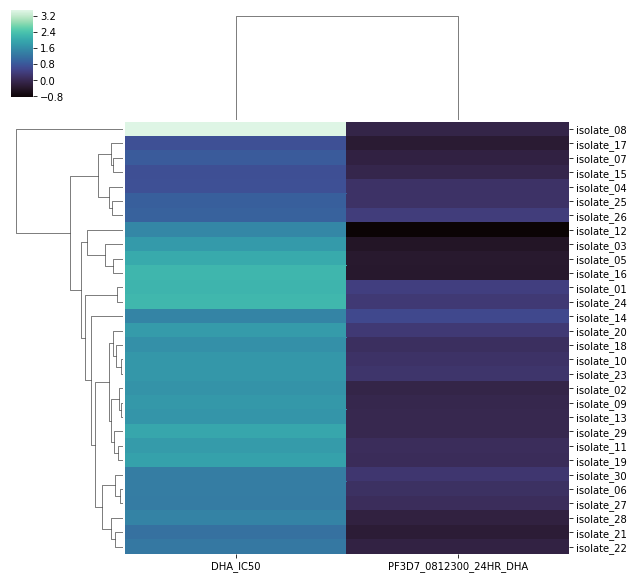

In [55]:
c = sn.clustermap(tmp.iloc[:,0:2], cmap="mako")

In [56]:
ic50 = tmp.pop("DHA_IC50")
reds_tuples = [(i,0,0) for i in np.linspace(0,1,30)]
reds_hex = [colors.to_hex(red) for red in reds_tuples]
greens_tuples = [(0,i,0) for i in np.linspace(0,1,30)]
greens_hex = [colors.to_hex(green) for green in greens_tuples]
blues_tuples = [(0,0,i) for i in np.linspace(0,1,30)]
blues_hex = [colors.to_hex(blue) for blue in blues_tuples]

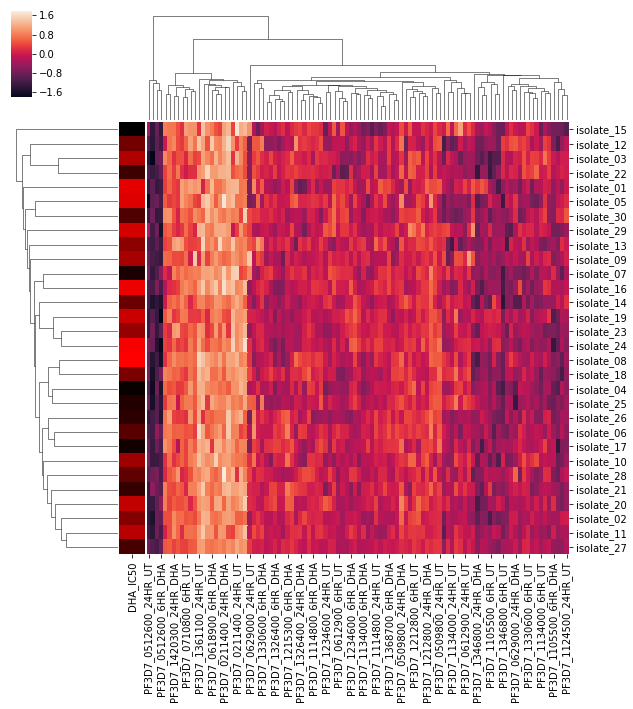

In [57]:
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp.iloc[:,0:100], row_colors=row_colors)

### 3.4 Make clustermaps by GO processes

In [58]:
GO.head(100)

,GO Process ID,GO Process Desc,IsInvolvedInArtemisinResistance,Gene_ID,Gene_Count
0,GO:0015031,protein transport,1,"[PF3D7_1434700, PF3D7_0501300, PF3D7_0103100, ...",6
1,GO:0042147,"retrograde transport, endosome to Golgi",1,"[PF3D7_0103100, PF3D7_1250300, PF3D7_1110500, ...",4
2,GO:0015860,purine nucleoside transmembrane transport,1,"[PF3D7_1347200, PF3D7_0103200]",2
3,GO:2001139,negative regulation of phospholipid transport,1,[PF3D7_0104200],1
4,GO:0015914,phospholipid transport,1,"[PF3D7_0104200, PF3D7_1463500, PF3D7_1219600]",3
5,GO:0060627,regulation of vesicle-mediated transport,1,"[PF3D7_1144900, PF3D7_0211200, PF3D7_1231100, ...",10
6,GO:0000278,mitotic cell cycle,1,"[PF3D7_0107000, PF3D7_1446600, PF3D7_0317200, ...",4
7,GO:0009405,pathogenesis,1,"[PF3D7_0826100, PF3D7_1209300, PF3D7_1302200, ...",10
8,GO:0010998,regulation of translational initiation by eIF2...,1,[PF3D7_0107600],1
9,GO:0007021,tubulin complex assembly,1,[PF3D7_0109400],1


In [59]:
def getGenesFromGO(GO_process_ID):
    return list(GO[GO["GO Process ID"]==GO_process_ID]["Gene_ID"])[0]

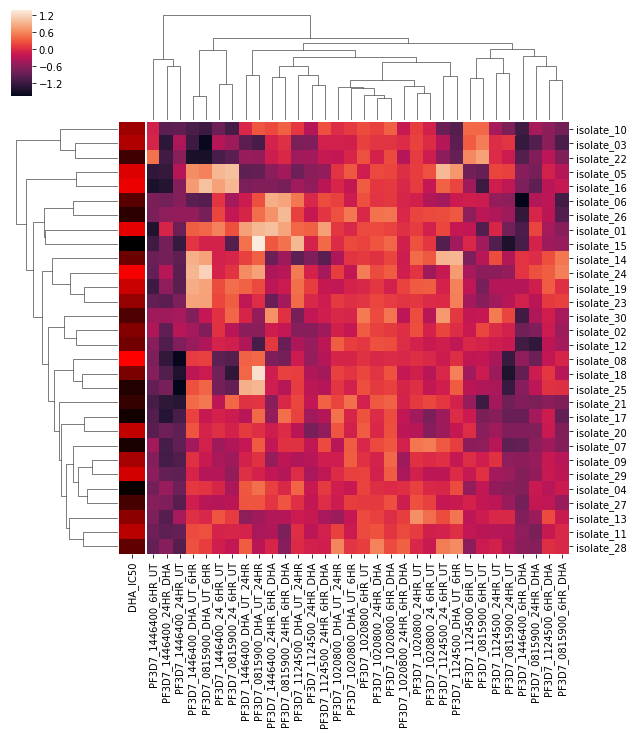

In [60]:
genes_selected = getGenesFromGO("GO:0006086")
cols = [gene_dict[gene] + gene_deltas_dict[gene] for gene in genes_selected]
final_cols = []
for col in cols:
    final_cols = final_cols + col
lut = dict(zip(ic50.sort_values(), reds_hex))
row_colors = ic50.map(lut)
g = sn.clustermap(tmp[final_cols], row_colors=row_colors)

In [61]:
ic50.sort_values()

isolate_15    0.6933
isolate_04    0.7100
isolate_17    0.7200
isolate_07    0.8567
isolate_25    0.9350
isolate_26    0.9667
isolate_21    1.1900
isolate_22    1.2830
isolate_27    1.3480
isolate_30    1.3630
isolate_06    1.3670
isolate_28    1.4530
isolate_14    1.4700
isolate_12    1.5170
isolate_18    1.6470
isolate_02    1.6970
isolate_13    1.7230
isolate_23    1.7440
isolate_10    1.7540
isolate_09    1.7650
isolate_03    1.7990
isolate_11    1.8200
isolate_20    1.8240
isolate_19    1.9060
isolate_29    1.9900
isolate_05    2.0250
isolate_01    2.1770
isolate_16    2.2100
isolate_24    2.2360
isolate_08    3.4600
Name: DHA_IC50, dtype: float64

## 4. Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16

### Models to try out
* [LASSO (R2)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Linear Regression (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 4.1 Create the functions

In [63]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [64]:
genes_dict={}
for gene in gene_dict:
    genes_dict[gene]=gene_dict[gene]+gene_deltas_dict[gene]
genes_dict

{'PF3D7_0812300': ['PF3D7_0812300_24HR_DHA',
  'PF3D7_0812300_24HR_UT',
  'PF3D7_0812300_6HR_DHA',
  'PF3D7_0812300_6HR_UT',
  'PF3D7_0812300_24HR_6HR_DHA',
  'PF3D7_0812300_24_6HR_UT',
  'PF3D7_0812300_DHA_UT_6HR',
  'PF3D7_0812300_DHA_UT_24HR'],
 'PF3D7_1420300': ['PF3D7_1420300_24HR_DHA',
  'PF3D7_1420300_24HR_UT',
  'PF3D7_1420300_6HR_DHA',
  'PF3D7_1420300_6HR_UT',
  'PF3D7_1420300_24HR_6HR_DHA',
  'PF3D7_1420300_24_6HR_UT',
  'PF3D7_1420300_DHA_UT_6HR',
  'PF3D7_1420300_DHA_UT_24HR'],
 'PF3D7_1234600': ['PF3D7_1234600_24HR_DHA',
  'PF3D7_1234600_24HR_UT',
  'PF3D7_1234600_6HR_DHA',
  'PF3D7_1234600_6HR_UT',
  'PF3D7_1234600_24HR_6HR_DHA',
  'PF3D7_1234600_24_6HR_UT',
  'PF3D7_1234600_DHA_UT_6HR',
  'PF3D7_1234600_DHA_UT_24HR'],
 'PF3D7_0710800': ['PF3D7_0710800_24HR_DHA',
  'PF3D7_0710800_24HR_UT',
  'PF3D7_0710800_6HR_DHA',
  'PF3D7_0710800_6HR_UT',
  'PF3D7_0710800_24HR_6HR_DHA',
  'PF3D7_0710800_24_6HR_UT',
  'PF3D7_0710800_DHA_UT_6HR',
  'PF3D7_0710800_DHA_UT_24HR'],
 'PF3D7_

In [65]:
def getGenesColumnLabels(genes):
    genes_column_labels=[]
    for gene in genes:
        genes_column_labels+=genes_dict[gene]
        
    return genes_column_labels

In [66]:
def findTrainIsolates(val_isolates,df):
    train_isolates=list(set(df.index)-set(val_isolates))
    train_isolates.sort()
    return train_isolates

In [67]:
def filterDfByIsolates(isolates,df):
    filtered_df=df.loc[isolates]
    return filtered_df

In [68]:
def filterDfByGenes(genes,df):
    genes_to_filter=getGenesColumnLabels(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [69]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

In [70]:
best_score=[0]
best_genes=[]
selected_genes=[]
selected_scores=[]
N=5
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=best_score[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,flat_train,flat_IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene
    
    selected_genes.append(best_gene_so_far)
    selected_scores.append(best_score_so_far)

<function matplotlib.pyplot.show(*args, **kw)>

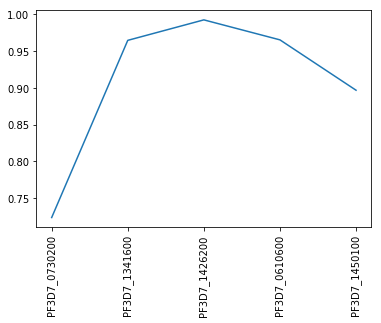

In [71]:
#N=5
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

### 4.2 Try the model with the three selected genes

In [186]:
selected_genes=['PF3D7_0730200','PF3D7_1341600','PF3D7_1426200']

In [104]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [187]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

['PF3D7_0730200']

In [106]:
try_model=tryModel(gene,val_isolates,flat_train,flat_IC50)

y=try_model['y_val']

y_pred=try_model['y_pred']

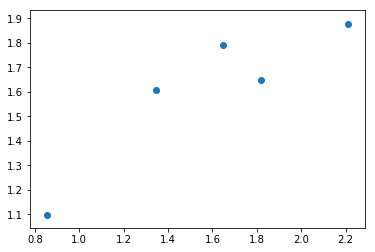

In [111]:
plt.scatter(y,y_pred)

In [119]:
try_model2=tryModel(selected_genes,val_isolates,flat_train,flat_IC50)

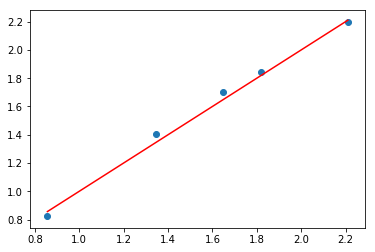

In [128]:
y=try_model2['y_val']

y_pred=try_model2['y_pred']

x=np.linspace(min(y),max(y),100)

plt.scatter(y,y_pred)
plt.plot(x,x,'r-')

In [182]:
selected_genes_df=PF_genes

In [183]:
selected_genes_df.set_index(PF_genes['Gene ID'],inplace=True)

In [184]:
selected_genes_df.loc[genes]

,Gene ID,Genomic Location (Gene),Product Description,Computed GO Component IDs,Computed GO Components,Computed GO Function IDs,Computed GO Functions,Computed GO Process IDs,Computed GO Processes,Curated GO Component IDs,Curated GO Components,Curated GO Function IDs,Curated GO Functions,Curated GO Process IDs,Curated GO Processes,EC numbers,EC numbers from OrthoMCL
Gene ID,,,,,,,,,,,,,,,,,
PF3D7_0730200,PF3D7_0730200,"Pf3D7_07_v3:1,286,057..1,289,399(-)","AP-4 complex subunit beta, putative",GO:0030131;GO:0030117,clathrin adaptor complex;membrane coat,GO:0005488;GO:0030276,binding;clathrin binding,GO:0006886;GO:0015031;GO:0016192,intracellular protein transport;protein transp...,GO:0030130;GO:0005737,clathrin coat of trans-Golgi network vesicle;c...,NaN,NaN,GO:0016192,vesicle-mediated transport,NaN,NaN
PF3D7_1341600,PF3D7_1341600,"Pf3D7_13_v3:1,642,119..1,644,479(+)",GPI mannosyltransferase 3,NaN,NaN,GO:0016757,"transferase activity, transferring glycosyl gr...",NaN,NaN,GO:0005783;GO:0016021,endoplasmic reticulum;integral component of me...,GO:0004584,dolichyl-phosphate-mannose-glycolipid alpha-ma...,GO:0006506,GPI anchor biosynthetic process,2.4.1.- (Hexosyltransferases.),2.4.1.- (Hexosyltransferases.)
PF3D7_1426200,PF3D7_1426200,"Pf3D7_14_v3:1,021,652..1,022,857(-)",protein arginine N-methyltransferase 1,NaN,NaN,GO:0008168,methyltransferase activity,GO:0006479,protein methylation,GO:0005737;GO:0005634,cytoplasm;nucleus,GO:0016274,protein-arginine N-methyltransferase activity,GO:0016070;GO:0006396;GO:0016571;GO:0042254,RNA metabolic process;RNA processing;histone m...,2.1.1.125 (Histone-arginine N-methyltransferase),2.1.1.125 (Histone-arginine N-methyltransferase)


### 4.3 Train the model with all the isolates and only the three selected genes

In [188]:
selected_genes

['PF3D7_0730200', 'PF3D7_1341600', 'PF3D7_1426200']

In [193]:
selected_train=flat_train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_01,-0.037031,-0.073334,-0.530240,-0.245317,0.493209,0.171984,-0.284922,0.036303,0.188004,-0.787045,...,0.253384,0.975049,-0.128304,0.715598,0.011499,0.981056,-0.139804,-0.265458,-0.969557,-0.843902
isolate_02,-0.112674,-0.302915,-0.450089,-0.428044,0.337415,0.125129,-0.022045,0.190242,-0.517961,-0.480987,...,-0.250033,-0.036974,0.240229,0.013204,0.108668,0.220774,0.131561,-0.207570,-0.112106,0.227026
isolate_03,0.074458,-0.100457,0.117450,-0.109150,-0.042992,0.008693,0.226599,0.174914,-0.434341,0.022822,...,-0.940996,-0.457163,0.345671,-0.097277,0.413015,-0.258171,-0.067345,0.160894,0.671187,0.442948
isolate_04,-0.321503,-0.201828,-0.112915,-0.380831,-0.208588,0.179003,0.267916,-0.119675,-0.347945,-1.016586,...,0.370128,0.668641,0.017374,0.456434,-0.186565,-0.109549,0.203938,0.565983,-0.077016,-0.439060
isolate_05,-0.038549,-0.250931,-0.265711,-0.085343,0.227162,-0.165588,-0.180369,0.212381,-0.818626,-0.143570,...,0.805311,-0.675056,0.652695,-0.293320,0.351933,0.334961,0.300762,-0.628281,0.016973,0.946015


In [192]:
X=selected_train
y=flat_IC50

model=LinearRegression().fit(X.values,y.values)

### 4.4 Save the model

In [194]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'model1_140719.pkl') 

['model1_140719.pkl']